In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Split data into train and test data
from sklearn.model_selection import train_test_split

# Preprocessing:
from sklearn.preprocessing import StandardScaler

# Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree

# To draw decision tree
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz


from sklearn.datasets import load_iris
import os

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('Gender Classification.csv')

In [3]:
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [5]:
df.isna().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [6]:
df.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


In [7]:
count = df.Gender.value_counts()
print(count)

F    33
M    33
Name: Gender, dtype: int64


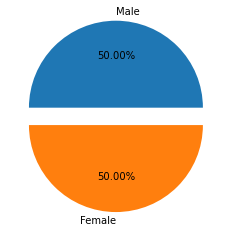

In [8]:
myexp = [0.2, 0]
plt.pie (count, labels = ("Male","Female") , explode = myexp, autopct = "%.2f%%")
plt.show()

# Encoding Data

In [9]:
df ['Favorite Color'] = df ['Favorite Color'].replace({'Cool': 0, 'Neutral': 1, 'Warm': 2})
df ['Favorite Music Genre'] = df ['Favorite Music Genre'].replace({'Rock': 0, 'Hip hop': 1, 'Folk/Traditional': 2, 'Jazz/Blues' : 3, 'Pop' : 4, 'Electronic' : 5, 'R&B and soul' : 6})
df ['Favorite Beverage'] = df ['Favorite Beverage'].replace({'Vodka': 0, 'Wine': 1, 'Whiskey': 2, "Doesn't drink" : 3, 'Beer' : 4, 'Other' : 5})
df ['Favorite Soft Drink'] = df ['Favorite Soft Drink'].replace({'7UP/Sprite': 0, 'Coca Cola/Pepsi': 1, 'Fanta': 2, 'Other' : 3})
df ['Gender'] = df ['Gender'].replace({'M': 1, 'F': 0})

In [10]:
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,0,0,0,0
1,1,1,0,1,0
2,2,0,1,1,0
3,2,2,2,2,0
4,0,0,0,1,0


# Training & Testing

In [11]:
x = df.drop('Gender', axis=1)
y = df['Gender']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=100)
x.head() 

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink
0,0,0,0,0
1,1,1,0,1
2,2,0,1,1
3,2,2,2,2
4,0,0,0,1


# KNN

In [12]:
Learn = KNeighborsClassifier(n_neighbors=4)
Learn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [13]:
print("Accuracy: ", Learn.score(x_test, y_test)*100)

Accuracy:  64.28571428571429


In [14]:
FavoriteColor = input('Enter 0 for Cool, 1 for Neutral, 2 for Warm: ')
FavoriteMusicGenre = input('Enter 0 for Rock, 1 for Hip hop, 2 for Folk/Traditional, 3 for Jazz/Blues, 4 for Pop, 5 for Electronic, 6 for R&B and soul: ')
FavoriteBeverage = input("Enter 0 for Vodka, 1 for Wine, 2 for Whiskey, 3 for Doesn't drink, 4 for Beer, 5 for Other: ")
FavoriteSoftDrink = input("Enter 0 for 7UP/Sprite, 1 for Coca Cola/Pepsi, 2 for Fanta, 3 for Other: ") 
x_actual_values=[FavoriteColor, FavoriteMusicGenre, FavoriteBeverage, FavoriteSoftDrink]
print (x_actual_values)

Enter 0 for Cool, 1 for Neutral, 2 for Warm: 1
Enter 0 for Rock, 1 for Hip hop, 2 for Folk/Traditional, 3 for Jazz/Blues, 4 for Pop, 5 for Electronic, 6 for R&B and soul: 4
Enter 0 for Vodka, 1 for Wine, 2 for Whiskey, 3 for Doesn't drink, 4 for Beer, 5 for Other: 1
Enter 0 for 7UP/Sprite, 1 for Coca Cola/Pepsi, 2 for Fanta, 3 for Other: 1
['1', '4', '1', '1']


In [15]:
x_actual_values=np.array(x_actual_values).astype('int16')
x_actual_values=x_actual_values.reshape(1,4)
x_actual_values=pd.DataFrame(x_actual_values)
x_actual_values.columns=(['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage', 'Favorite Soft Drink'])
y_actual_pred=Learn.predict(x_actual_values)
print('What is the gender of the person \n1 for Male 0 for Female. \n As per KNN the answer is =',y_actual_pred)

What is the gender of the person 
1 for Male 0 for Female. 
 As per KNN the answer is = [0]


# Decision Tree

In [16]:
dectree = dtree(
           criterion="gini",    # gini
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [17]:
dectree.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
y_predicted = dectree.predict(x_test)
y_predicted

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [19]:
correct_decisions = np.sum((y_test == y_predicted))
correct_decisions

8

In [20]:
y_test.size

14

In [21]:
 
print ("Accuracy: ", (correct_decisions/y_test.size)*100) 

Accuracy:  57.14285714285714


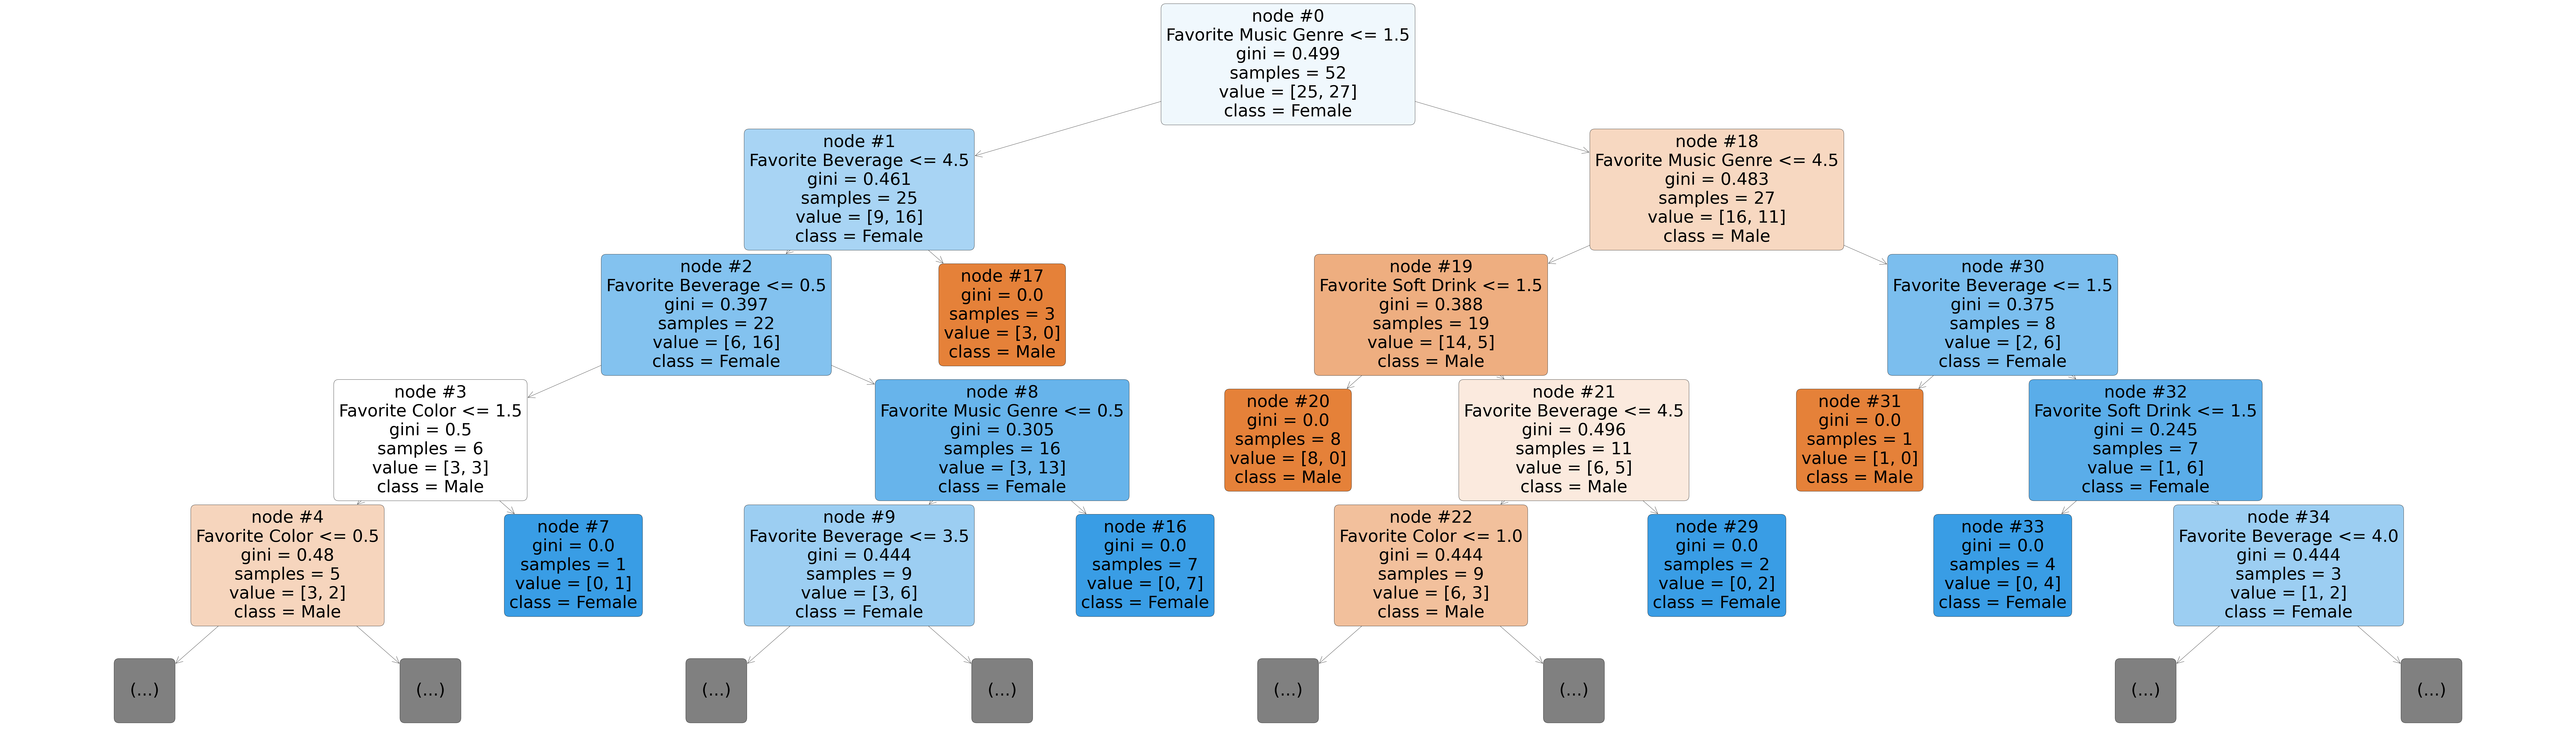

In [22]:
plt.figure(figsize=(200,60))
plot_tree(
            dectree,
            max_depth = 4,  # Draw upto depth of 4
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage', 'Favorite Soft Drink'],
            class_names = ["Male","Female"]
            )

plt.show()

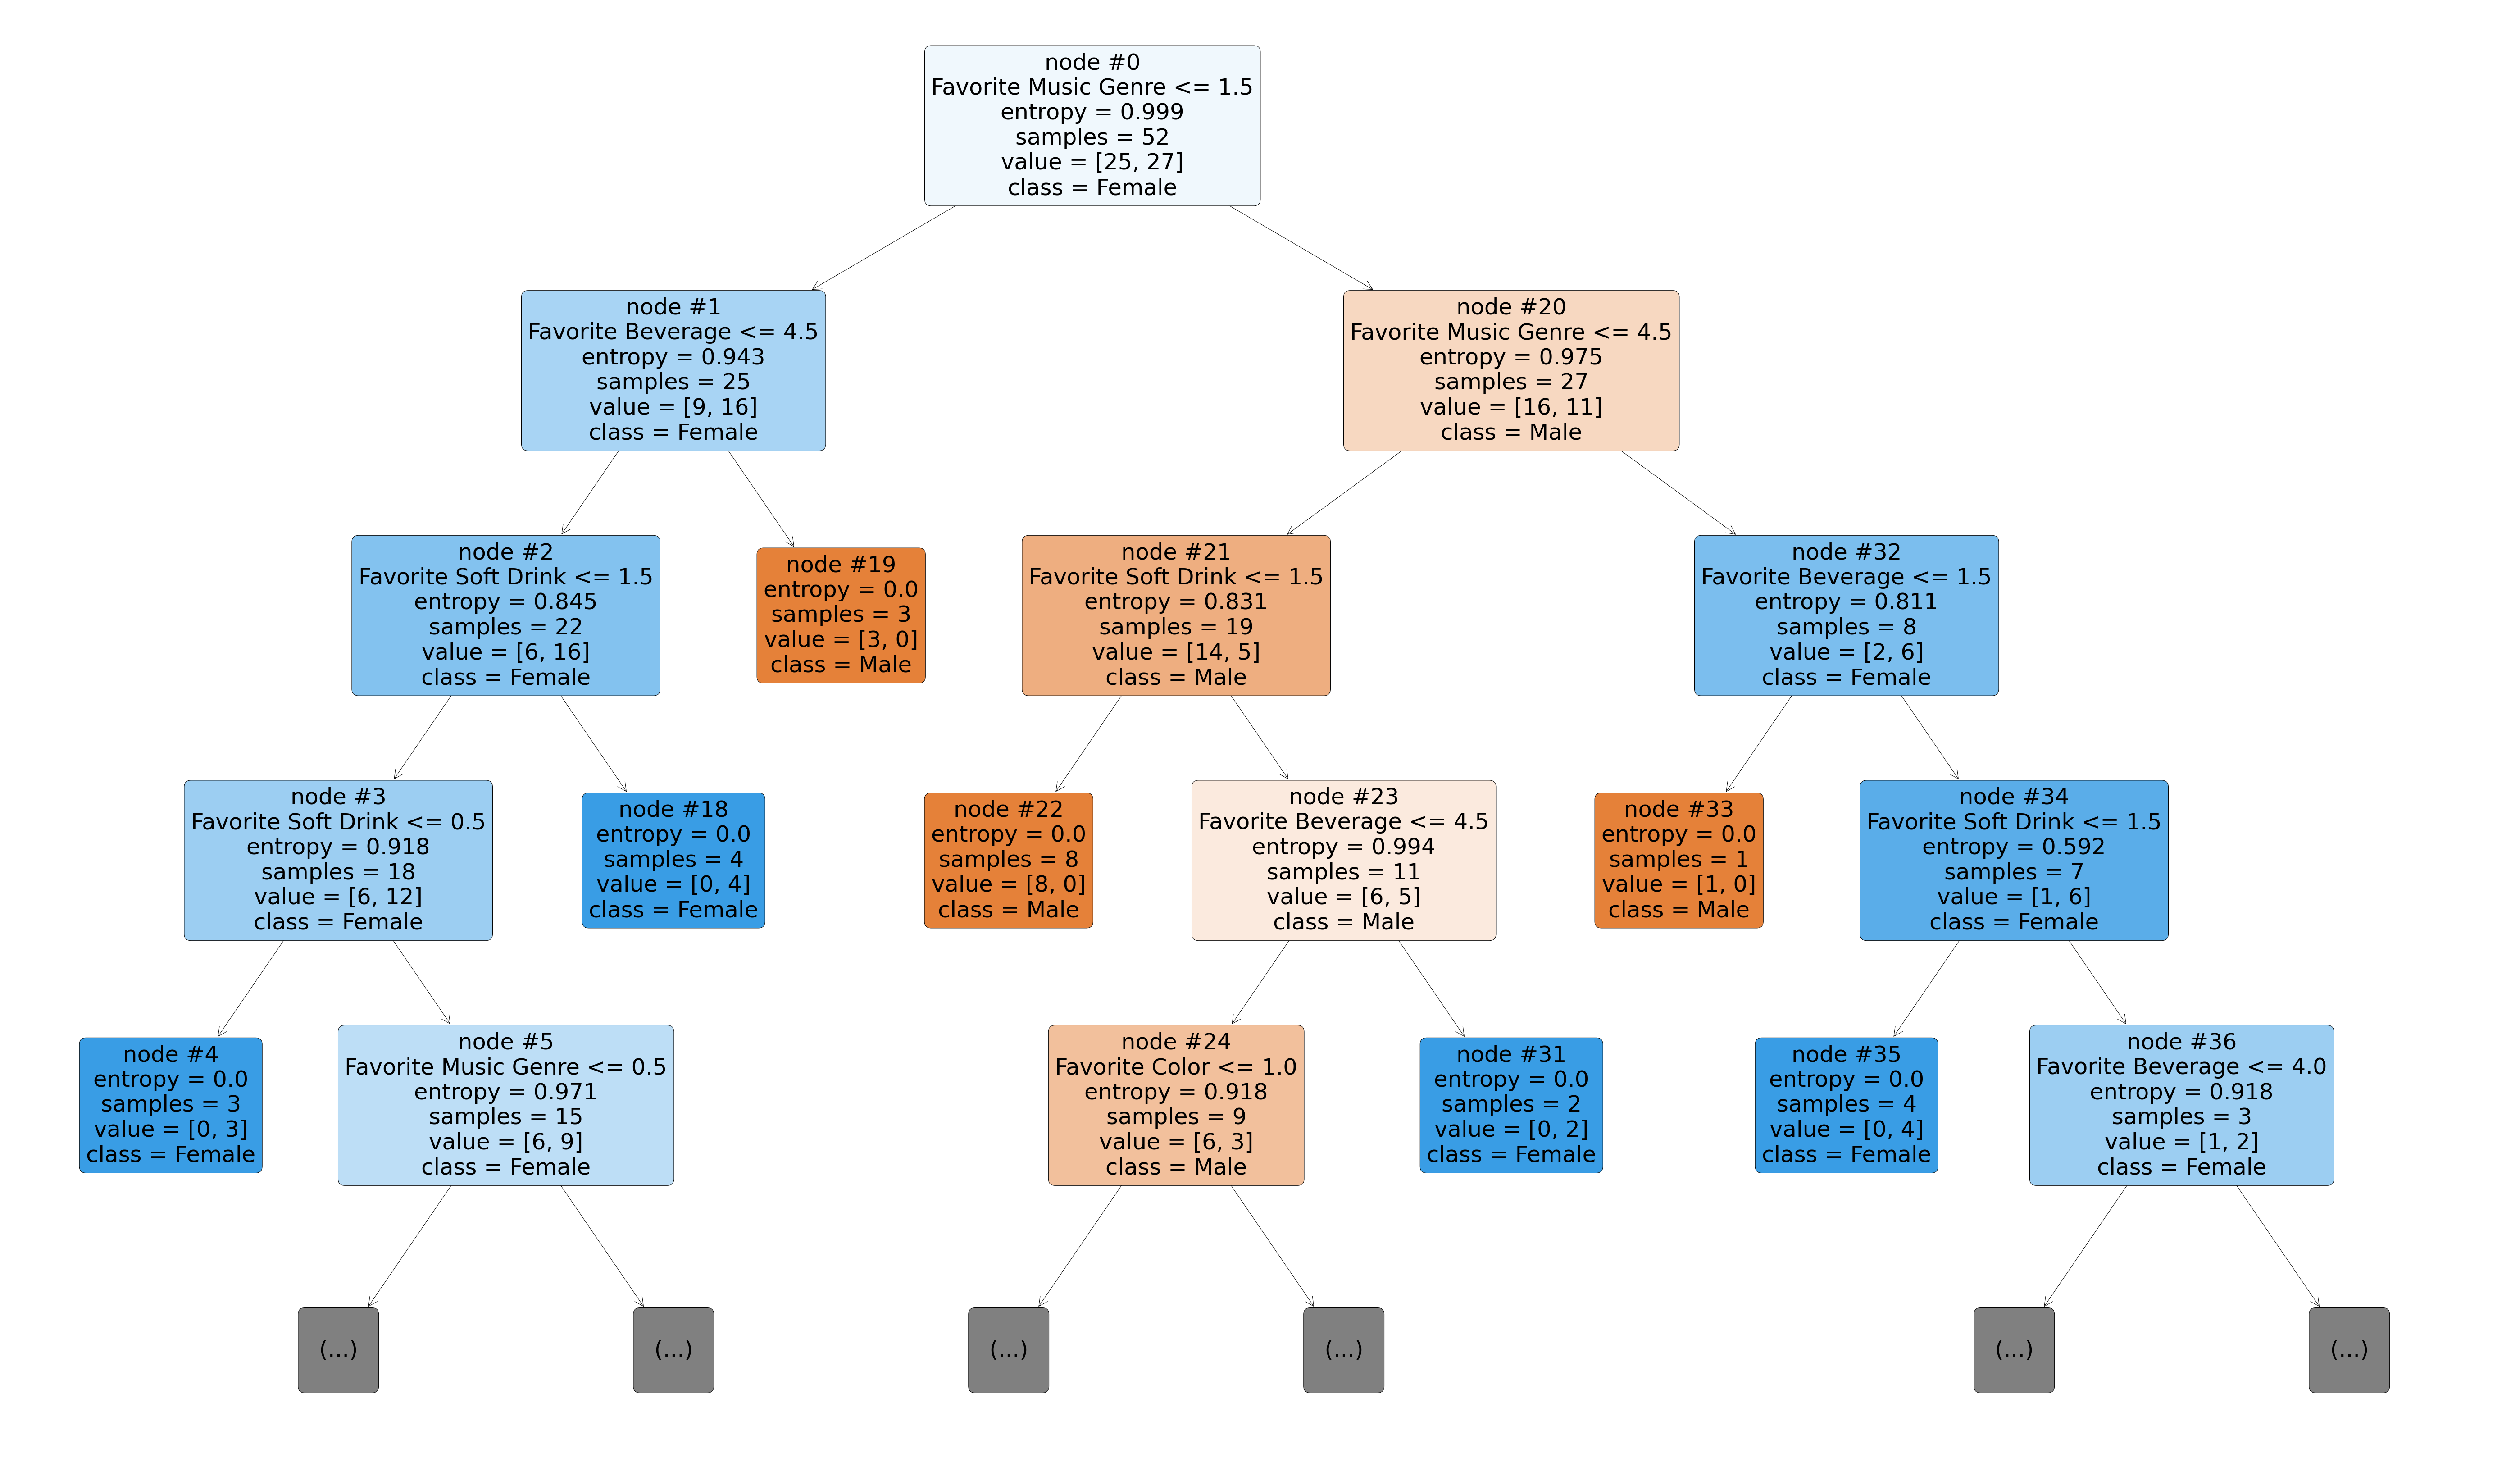

In [23]:
dectree = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
dectree.fit(x_train,y_train)


plt.figure(figsize=(100,60))
plot_tree(
            dectree,
            max_depth = 4,  # Draw upto depth of 4
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage', 'Favorite Soft Drink'],
            class_names = ["Male","Female"]
            )

plt.show()

In [45]:
correct_decisions = dectree.predict(x_test)
Accuracy = np.sum((y_test == correct_decisions))/y_test.size

In [46]:
print ("Accuracy: ", Accuracy*100)

Accuracy:  50.0


In [47]:
fi = dectree.feature_importances_
fi

array([0.07421802, 0.22394218, 0.47800529, 0.22383452])

In [48]:
list(zip(x_actual_values.columns, fi))

[('Favorite Color', 0.07421801694747324),
 ('Favorite Music Genre', 0.22394217632865557),
 ('Favorite Beverage', 0.4780052863500253),
 ('Favorite Soft Drink', 0.22383452037384582)]

# Random Forest

In [49]:
cl_random=RandomForestClassifier(n_estimators=10)
cl_random.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [50]:
cl_random.score(x_test, y_test)*100

57.14285714285714

In [51]:
y_pred = cl_random.predict(x_test)

In [52]:
cm = metrics.confusion_matrix(y_test, y_pred)
print (cm)

[[5 3]
 [3 3]]


In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.50      0.50      0.50         6

    accuracy                           0.57        14
   macro avg       0.56      0.56      0.56        14
weighted avg       0.57      0.57      0.57        14



In [54]:
y_pred = cl_random.predict(x_test)

In [55]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.42857142857142855
Mean Squared Error: 0.42857142857142855
Root Mean Squared Error: 0.6546536707079771


Text(33.0, 0.5, 'Actual')

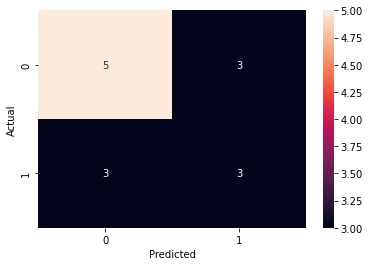

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure()
sn.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

The accuracy for: 
KNN = 64.28%
Decision Tree Gini = 57.14%
Decision Tree Entropy = 50.0%
Random Forest = 57.14%

In [57]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

In [58]:
import pandas as pd
from sklearn.model_selection import cross_validate, ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2)
cv_results = cross_validate(regressor, x, y,
                            cv=cv, scoring="neg_mean_absolute_error",
                            return_train_score=True, n_jobs=2)
cv_results = pd.DataFrame(cv_results)

In [59]:
scores = pd.DataFrame()
scores[["train error", "test error"]] = -cv_results[
    ["train_score", "test_score"]]

Text(0.5, 1.0, 'Train and test errors distribution via cross-validation')

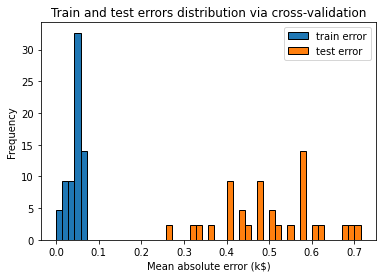

In [61]:
import matplotlib.pyplot as plt

scores.plot.hist(bins=50, edgecolor="black", density=True)
plt.xlabel("Mean absolute error (k$)")
plt.title("Train and test errors distribution via cross-validation")

In [65]:
from sklearn.model_selection import validation_curve

max_depth = [1, 2, 3, 4, 5]
train_scores, test_scores = validation_curve(regressor, x, y, param_name="max_depth", param_range=max_depth,cv=cv, scoring="neg_mean_absolute_error", n_jobs=2)
train_errors, test_errors = -train_scores, -test_scores

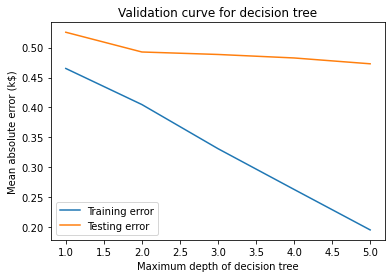

In [66]:
plt.plot(max_depth, train_errors.mean(axis=1), label="Training error")
plt.plot(max_depth, test_errors.mean(axis=1), label="Testing error")
plt.legend()

plt.xlabel("Maximum depth of decision tree")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for decision tree")

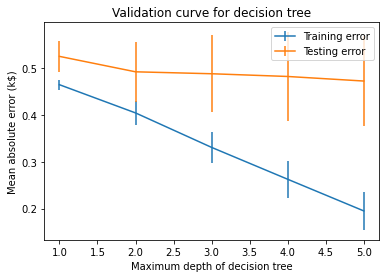

In [67]:
plt.errorbar(max_depth, train_errors.mean(axis=1),
             yerr=train_errors.std(axis=1), label='Training error')
plt.errorbar(max_depth, test_errors.mean(axis=1),
             yerr=test_errors.std(axis=1), label='Testing error')
plt.legend()

plt.xlabel("Maximum depth of decision tree")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for decision tree")